In [1]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [ ]:
file_path = 'denoise_wav/TEST_00015.wav'

data, rate = sf.read(file_path)

In [3]:
IPython.display.Audio(data=data, rate=rate)

In [4]:
reduced_noise = nr.reduce_noise(y = data, sr=rate, n_std_thresh_stationary=2.0,stationary=False)

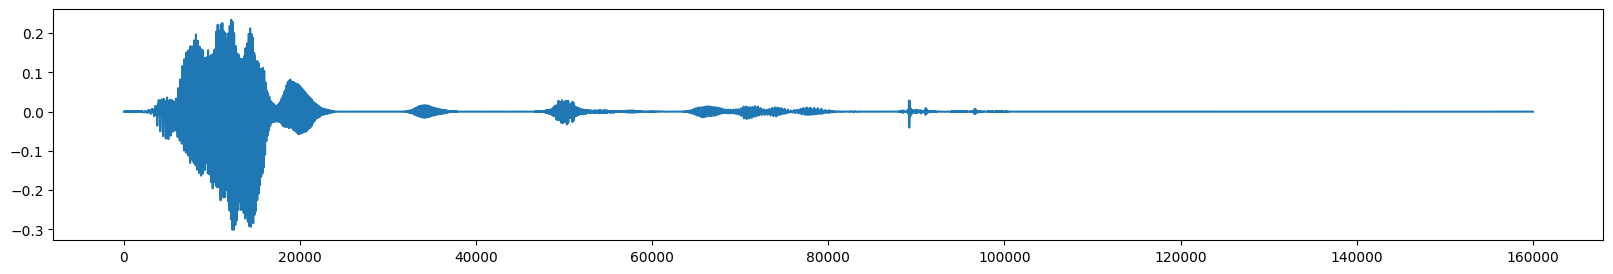

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [ ]:
IPython.display.Audio(data=reduced_noise, rate=rate)

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os
import pandas as pd
import numpy as np
import csv

def silence(name):
    # 파일 로드
    path = 'denoise_wav' + name + 'wav'
    audio = AudioSegment.from_wav(path)
    
    # 침묵 기준 설정 (예: -50 dBFS 이하, 최소 1000 ms)
    silence_thresh = -50
    min_silence_len = 500
    
    # 침묵으로 오디오 분할
    chunks = split_on_silence(audio, 
                              min_silence_len=min_silence_len, 
                              silence_thresh=silence_thresh)
    
    # 침묵을 제거한 오디오 조각들을 다시 합침
    output_audio = AudioSegment.empty()
    for chunk in chunks:
        output_audio += chunk
    
    # 결과 저장
    output_file_path = 'denoise_si_wav' + name + 'wav'
    output_audio.export(output_file_path, format="wav")
    del audio
    del output_audio

In [ ]:
df = pd.read_csv('open/test.csv')

for i in range(50000):
    if (i%1000 == 0): print(i)
    silence(df['path'][i][6:-3])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [ ]:
import os
import argparse
from pydub import AudioSegment
from pydub.silence import detect_nonsilent

class AudioProcessor:
    def __init__(self, input_file_path):
        self.input_file_path = input_file_path
        self.audio = AudioSegment.from_file(input_file_path, format="mp3")

    def split_audio_by_silence(self, min_silence_len, threshold):
        return detect_nonsilent(self.audio, min_silence_len=min_silence_len, silence_thresh=threshold)

    def save_audio(self, audio, output_path):
        audio.export(output_path, format="mp3")
        print(f"Saved audio to {output_path}")

    def save_timeline_to_text(self, timeline_data, output_path):
        with open(output_path, 'w') as file:
            file.write("[")
            for start, end in timeline_data:
                file.write(f"({start}, {end}), ")
            file.write("]")
        print(f"Saved timeline data to {output_path}")

    def process_audio(self, min_silence_len=100, threshold=-30, output_folder='output', index="00000"):
        try:
            print("Processing audio...")
            non_silent_parts = self.split_audio_by_silence(min_silence_len, threshold)
            audio_silent = AudioSegment.empty()
            audio_non_silent = AudioSegment.empty()
            silent_parts_times = []
            non_silent_parts_times = []

            for i, (start_time, end_time) in enumerate(non_silent_parts):
                audio_non_silent += self.audio[start_time:end_time]
                non_silent_parts_times.append((start_time, end_time))

                if i == 0:
                    silent_start_time = 0
                else:
                    silent_start_time = non_silent_parts[i - 1][1]
                silent_end_time = start_time

                audio_silent += self.audio[silent_start_time:silent_end_time]
                silent_parts_times.append((silent_start_time, silent_end_time))

            # Create the output folder if it doesn't exist
            os.makedirs(output_folder, exist_ok=True)

            # output_silent_path = os.path.join(output_folder, 'interview_silent.mp3')
            output_non_silent_path = os.path.join(output_folder, f'TEST_{index}.wav')
            # silent_txt_path = os.path.join(output_folder, 'silent_parts.txt')
            # non_silent_txt_path = os.path.join(output_folder, 'non_silent_parts.txt')

            # self.save_audio(audio_silent, output_silent_path)
            self.save_audio(audio_non_silent, output_non_silent_path)
            # self.save_timeline_to_text(silent_parts_times, silent_txt_path)
            # self.save_timeline_to_text(non_silent_parts_times, non_silent_txt_path)

            print("Audio processing completed.")
            # print("Audio with silent parts saved to:", output_silent_path)
            print("Audio with non-silent parts saved to:", output_non_silent_path)
            # print("Silent parts timeline saved to:", silent_txt_path)
            # print("Non-silent parts timeline saved to:", non_silent_txt_path)

        except Exception as e:
            print("An error occurred:", str(e))

def main():
    # parser = argparse.ArgumentParser(description="Audio processing script")
    # parser.add_argument("input_file", help="Input audio file path")
    # parser.add_argument("--output_folder", default="output", help="Output folder path")
    # parser.add_argument("--min_silence_len", type=int, default=100, help="Minimum silence length (in milliseconds)")
    # parser.add_argument("--threshold", type=int, default=-30, help="Silence threshold in dBFS")

    # args = parser.parse_args()


    for i in range(0,5):
        if i < 10000:
            i = "0"*(5-len(str(i))) + str(i)
        else:
            i = str(i)

        input_path = f"de/TEST_{i}.wav"
        output_dir = f"si/"

        audio_processor = AudioProcessor(input_path)
        audio_processor.process_audio(min_silence_len=500, threshold=-40, output_folder=output_dir, index=i)

if __name__ == "__main__":
    main()

C:\Users\Administrator\anaconda3\envs\specrnet\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Processing audio...
An error occurred: [WinError 2] 지정된 파일을 찾을 수 없습니다
Processing audio...
An error occurred: [WinError 2] 지정된 파일을 찾을 수 없습니다
Processing audio...
An error occurred: [WinError 2] 지정된 파일을 찾을 수 없습니다
Processing audio...
An error occurred: [WinError 2] 지정된 파일을 찾을 수 없습니다
Processing audio...
An error occurred: [WinError 2] 지정된 파일을 찾을 수 없습니다


In [ ]:
output_dir = 'denoise_si_wav'

for i in range(0,5):
    path = f'{output_dir}/TEST_{file_index:05d}/interview_silent.mp3'
    path_audio = f'{output_dir}/TEST_{file_index:05d}.wav'
    